In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import os
import mne
import random
from sklearn.metrics import classification_report
from numpy import zeros, newaxis
from scipy import signal
from scipy import fftpack


Bad key "text.kerning_factor" on line 4 in
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
MDD_dataset_Filenames = os.listdir('./full_dataset/MDD/EC/')
H_dataset_Filenames = os.listdir('./full_dataset/H/EC/')

MDD_dataset_list = []
H_dataset_list = []

for filename in MDD_dataset_Filenames:
    data = mne.io.read_raw_edf('./full_dataset/MDD/EC/' + str(filename), verbose=0)
    MDD_dataset_list.append(data)  
    
for filename in H_dataset_Filenames:
    data = mne.io.read_raw_edf('./full_dataset/H/EC/' + str(filename), verbose=0)
    H_dataset_list.append(data)  
MDD_dataset_Filenames[0:29]
H_dataset_Filenames[0:29]

['H S1 EC.edf',
 'H S10 EC.edf',
 'H S11 EC.edf',
 'H S12  EC.edf',
 'H S13 EC.edf',
 'H S14 EC.edf',
 'H S15 EC.edf',
 'H S16 EC.edf',
 'H S17 EC.edf',
 'H S19 EC.edf',
 'H S2 EC.edf',
 'H S20 EC.edf',
 'H S21 EC.edf',
 'H S22 EC.edf',
 'H S23 EC.edf',
 'H S24 EC.edf',
 'H S25 EC.edf',
 'H S26 EC.edf',
 'H S27 EC.edf',
 'H S28 EC.edf',
 'H S29 EC.edf',
 'H S3 EC.edf',
 'H S30 EC.edf',
 'H S4 EC.edf',
 'H S5 EC.edf',
 'H S6 EC.edf',
 'H S7 EC.edf',
 'H S8 EC.edf',
 'H S9 EC.edf']

In [3]:
MDD_dataframe = [] #MDD 환자의 데이터프레임 리스트
H_dataframe = [] #건강한 사람의 데이터프레임 리스트
y = []
eeg_columns = ['EEG Fp1-LE', 'EEG F7-LE', 'EEG Fp2-LE', 'EEG F8-LE']
for raw in MDD_dataset_list:
    raw_data = raw.get_data(return_times=True)
    channels = raw.ch_names
    T_data = np.transpose(raw_data[0])
    time = np.transpose(raw_data[1])
    temp = pd.DataFrame(T_data, columns = channels, index = time)
    temp = temp[eeg_columns]
    MDD_dataframe.append(temp.iloc[:30720]) #256 * 120 = 2min
    y.append(1)
    
for raw in H_dataset_list:
    raw_data = raw.get_data(return_times=True)
    channels = raw.ch_names
    T_data = np.transpose(raw_data[0])
    time = np.transpose(raw_data[1])
    temp = pd.DataFrame(temp)
    temp = temp[eeg_columns]
    H_dataframe.append(temp.iloc[:30720]) #256 * 120 = 2min
    y.append(0)
y = np.asarray(y)    
MDD_dataframe[0]

,EEG Fp1-LE,EEG F7-LE,EEG Fp2-LE,EEG F8-LE
0.000000,3.850294e-06,-7.450568e-06,4.550347e-06,5.450416e-06
0.003906,2.250172e-06,-7.750591e-06,2.650202e-06,8.550652e-06
0.007812,-5.000381e-08,-5.250401e-06,5.000381e-08,8.950683e-06
0.011719,-2.350179e-06,-2.050156e-06,-2.250172e-06,6.750515e-06
0.015625,-3.650278e-06,-1.500114e-07,-3.450263e-06,3.250248e-06
...,...,...,...,...
119.980469,-1.350103e-06,2.650202e-06,1.850141e-06,6.350484e-06
119.984375,-1.050080e-06,2.450187e-06,7.500572e-07,4.750362e-06
119.988281,4.500343e-07,2.450187e-06,5.000381e-08,2.350179e-06
119.992188,2.050156e-06,2.550195e-06,-2.500191e-07,4.500343e-07


In [4]:
#MDD[26]환자 열 개수 조정
MDD_dataframe[26] = MDD_dataframe[26][MDD_dataframe[0].columns]


In [5]:
low_pass_filter = signal.firwin(101, cutoff=32, fs=256, pass_zero='lowpass')
high_pass_filter = signal.firwin(101, cutoff=0.5, fs=256, pass_zero='highpass')

In [6]:
for j in range(0, len(MDD_dataframe)):
    col = list(MDD_dataframe[j].columns)
    for i in range(0, len(col)):
        clear_eeg = signal.lfilter(low_pass_filter, [1.0], MDD_dataframe[j][col[i]])
        clear_eeg = signal.lfilter(high_pass_filter, [1.0], clear_eeg)
        MDD_dataframe[j][col[i]] = clear_eeg

In [7]:
for j in range(0, len(H_dataframe)):
    col = list(H_dataframe[j].columns)
    for i in range(0, len(col)):
        clear_eeg = signal.lfilter(low_pass_filter, [1.0], H_dataframe[j][col[i]])
        clear_eeg = signal.lfilter(high_pass_filter, [1.0], clear_eeg)
        H_dataframe[j][col[i]] = clear_eeg

C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


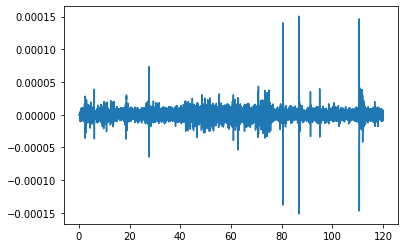

In [8]:
all_dataframe = MDD_dataframe + H_dataframe
all_dataframe[0]['EEG Fp1-LE'].plot()

In [9]:
delta_pass_filter =  signal.firwin(101, cutoff=[0.5,4], fs=256, pass_zero='bandpass')
theta_pass_filter =  signal.firwin(101, cutoff=[4,8], fs=256, pass_zero='bandpass')
alpha_pass_filter =  signal.firwin(101, cutoff=[8,13], fs=256, pass_zero='bandpass')
beta_pass_filter =  signal.firwin(101, cutoff=[13,30], fs=256, pass_zero='bandpass')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

def band_power(channel):
    df = pd.DataFrame()
    df['delta'] = signal.lfilter(delta_pass_filter, [1.0], channel)
    df['theta'] = signal.lfilter(theta_pass_filter, [1.0], channel)
    df['alpha'] = signal.lfilter(alpha_pass_filter, [1.0], channel)
    df['beta'] = signal.lfilter(beta_pass_filter, [1.0], channel)
    
    return df


In [10]:
def eeg_band_power_seperate(input_dataframe):
    #scaler = MinMaxScaler()
    X = np.zeros((1,4,4,30720))
    for dataframe in input_dataframe:
        columns = list(dataframe.columns)
        band_power_list = np.zeros((1,4,30720))
        for i in range(len(columns)):
            ch = band_power(dataframe[dataframe.columns[i]])
            ch = np.asarray(ch)
            band_power_list = np.vstack([band_power_list, ch.T[newaxis,:,:]])
        band_power_list = band_power_list[1:]
        X = np.vstack([X, band_power_list[newaxis,:,:,:]])
    return X

In [11]:
from sklearn.metrics import roc_curve
from keras import models
from keras import layers
from keras import backend as K

def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())


Using TensorFlow backend.


In [12]:
def index_to_list(list, index):
    return [list[i] for i in index]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_dataframe, y, test_size=0.3, random_state = 1)
X_train = eeg_band_power_seperate(X_train)
X_test = eeg_band_power_seperate(X_test)

In [14]:
X_train = X_train[1:]
X_test = X_test[1:]


In [15]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train = X_train.reshape(41*16,30720).T
X_test = X_test.reshape(18*16,30720).T

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(30720, 656)

In [16]:
X_train = X_train.T.reshape(41,4,4,30720)
X_test = X_test.T.reshape(18,4,4,30720)

In [17]:
#X_train = X_train.transpose(0,2,3,1)
#X_test = X_test.transpose(0,2,3,1)

In [18]:
SEED = 123456123
import os
import random as rn
import numpy as np

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

In [19]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

In [35]:
from keras.optimizers import Adam
def conv2d_model():
    opt = Adam(lr=0.0001)
    model = models.Sequential()

            #1
    model.add(layers.Conv2D(64, 4, 4,
                            border_mode='same',
                            activation='relu',
                            input_shape=(4,4,30720)))
    model.add(layers.MaxPooling2D(pool_size=(2,2),padding = 'same'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(128, 4, 4,
                            border_mode='same',
                            activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2),padding = 'same'))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))


    model.compile(optimizer=opt,
                    loss='binary_crossentropy',
                    metrics=['accuracy', sensitivity, specificity])
    return model

In [36]:
K.clear_session()

In [37]:
model = conv2d_model()
history = model.fit(X_train, y_train, epochs=25, batch_size=256, verbose=1, validation_data = (X_test, y_test))
history_dict = history.history

C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


Train on 41 samples, validate on 18 samples
Epoch 1/25
41/41 [==============================] - 1s 14ms/step - loss: 0.6980 - accuracy: 0.4634 - sensitivity: 0.1739 - specificity: 0.8333 - val_loss: 0.5910 - val_accuracy: 0.6111 - val_sensitivity: 0.0000e+00 - val_specificity: 1.0000
Epoch 2/25
41/41 [==============================] - 0s 8ms/step - loss: 0.6698 - accuracy: 0.4634 - sensitivity: 0.0435 - specificity: 1.0000 - val_loss: 0.4951 - val_accuracy: 0.6111 - val_sensitivity: 0.0000e+00 - val_specificity: 1.0000
Epoch 3/25
41/41 [==============================] - 0s 8ms/step - loss: 0.6295 - accuracy: 0.5122 - sensitivity: 0.1304 - specificity: 1.0000 - val_loss: 0.4145 - val_accuracy: 0.6111 - val_sensitivity: 0.0000e+00 - val_specificity: 1.0000
Epoch 4/25
41/41 [==============================] - 0s 8ms/step - loss: 0.5775 - accuracy: 0.5610 - sensitivity: 0.2174 - specificity: 1.0000 - val_loss: 0.3568 - val_accuracy: 0.6111 - val_sensitivity: 0.0000e+00 - val_specificity: 1.

In [38]:
model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 6ms/step


[0.25441789627075195, 0.9444444179534912, 0.8571428656578064, 1.0]

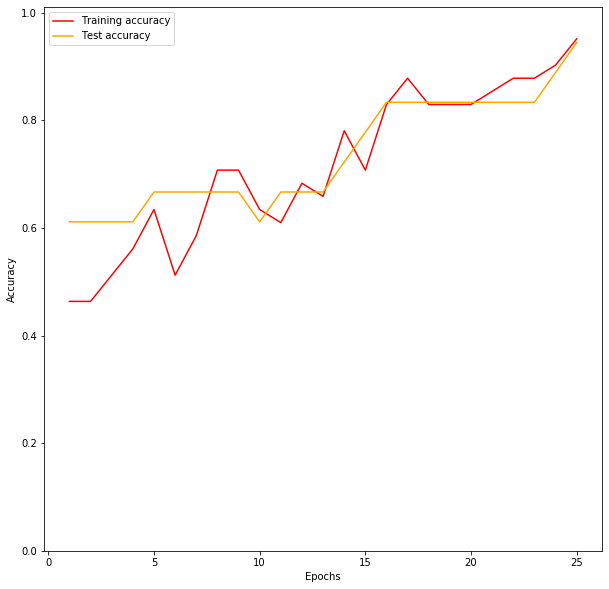

In [39]:

accuracy = history_dict['accuracy']   
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(10,10))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'orange', label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1.01)
plt.legend()

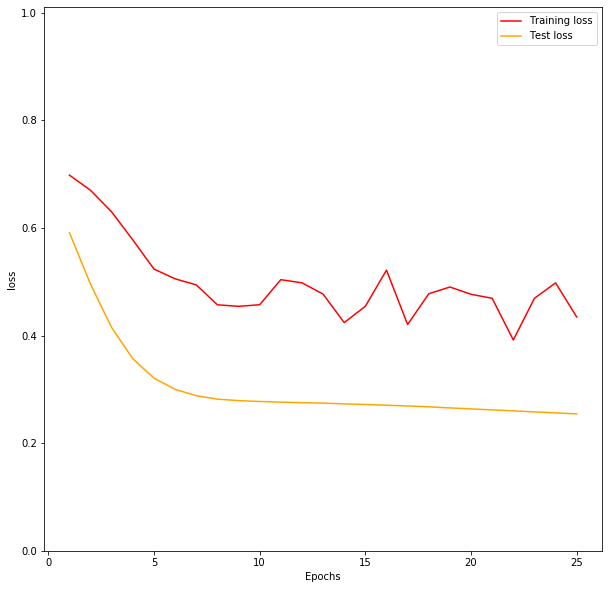

In [40]:
loss = history_dict['loss']   
val_loss = history_dict['val_loss']
plt.figure(figsize=(10,10))
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim(0,1.01)
plt.legend()

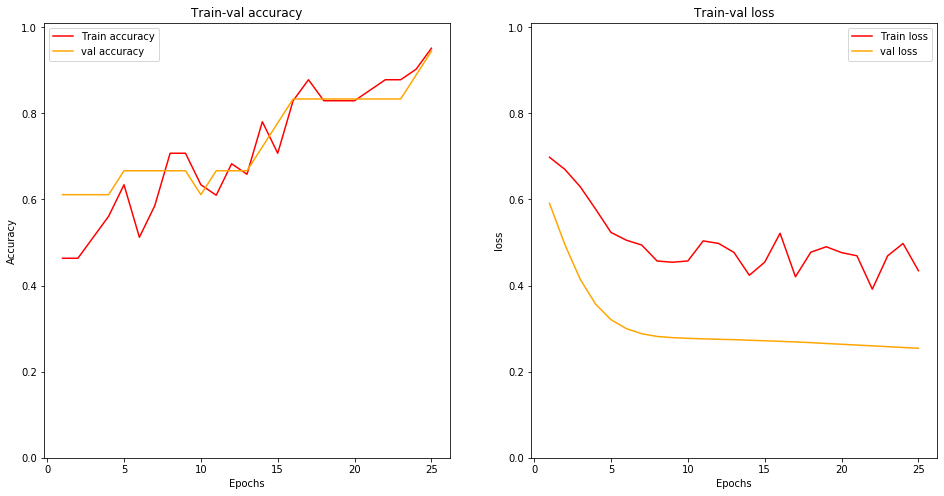

In [61]:

accuracy = history_dict['accuracy']   
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Train-val accuracy")
plt.plot(epochs, accuracy, 'r', label='Train accuracy')
plt.plot(epochs, val_accuracy, 'orange', label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1.01)
plt.legend()

loss = history_dict['loss']   
val_loss = history_dict['val_loss']

plt.subplot(1,2,2)
epochs = range(1, len(loss) + 1)
plt.title("Train-val loss")
plt.plot(epochs, loss, 'r', label='Train loss')
plt.plot(epochs, val_loss, 'orange', label='val loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim(0,1.01)
plt.legend()


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 4, 4, 64)          31457344  
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         131200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [43]:
model.save('MDD_model.h5')

In [44]:
import pickle
with open('model.pickle', 'wb') as f:
    pickle.dump(history, f, pickle.HIGHEST_PROTOCOL)
    

# K-fold Val

In [47]:
accuracy_scores = []
sensitivity_scores = []
specificity_scores = []

import keras.backend.tensorflow_backend as Keras_GPU
from sklearn.model_selection import KFold
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
for i in range(10):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    print("{}st fold".format(i))
    for train, test in kfold.split(all_dataframe, y):
        K.clear_session()
        
        X_train = index_to_list(all_dataframe, train)
        y_train = y[train]
        X_test = index_to_list(all_dataframe, test)
        y_test = y[test]


        X_train = eeg_band_power_seperate(X_train)
        X_test = eeg_band_power_seperate(X_test)
        
        X_train = X_train[1:]
        X_test = X_test[1:]
        
        X_train_shape = X_train.shape
        X_test_shape = X_test.shape
        
        scaler = Normalizer()
        X_train = X_train.reshape(X_train_shape[0]*X_train_shape[1]*X_train_shape[2],30720).T
        X_test = X_test.reshape(X_test_shape[0]*X_test_shape[1]*X_test_shape[2],30720).T

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        X_train = X_train.T.reshape(X_train_shape[0],X_train_shape[1],X_train_shape[2],30720)
        X_test = X_test.T.reshape(X_test_shape[0],X_test_shape[1],X_test_shape[2],30720)


        model = conv2d_model()


        model.compile(optimizer='Adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', sensitivity, specificity])

        model.fit(X_train, y_train, epochs=25, batch_size=256, verbose=0)

        scores = model.evaluate(X_test, y_test, verbose=0)

        #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        #print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
        #print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))

        print("\n")
        accuracy_scores.append(scores[1])
        sensitivity_scores.append(scores[2])
        specificity_scores.append(scores[3])

print("평균")
print("%.2f (+/- %.2f%%)" % (np.mean(accuracy_scores), np.std(accuracy_scores)))
print("%.2f (+/- %.2f%%)" % (np.mean(sensitivity_scores), np.std(sensitivity_scores)))
print("%.2f (+/- %.2f%%)" % (np.mean(specificity_scores), np.std(specificity_scores)))

    
    
    
    
    

0st fold


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app




0.97 (+/- 0.07%)
0.92 (+/- 0.16%)
1.00 (+/- 0.00%)
1st fold


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app




0.97 (+/- 0.08%)
0.93 (+/- 0.18%)
0.95 (+/- 0.22%)
2st fold


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app




0.97 (+/- 0.08%)
0.92 (+/- 0.18%)
0.97 (+/- 0.18%)
3st fold


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app




0.97 (+/- 0.08%)
0.92 (+/- 0.17%)
0.97 (+/- 0.16%)
4st fold


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app




0.97 (+/- 0.07%)
0.89 (+/- 0.24%)
0.98 (+/- 0.14%)
5st fold


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app




0.97 (+/- 0.07%)
0.89 (+/- 0.25%)
0.98 (+/- 0.13%)
6st fold


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app




0.97 (+/- 0.07%)
0.90 (+/- 0.24%)
0.99 (+/- 0.12%)
7st fold


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app




0.97 (+/- 0.07%)
0.90 (+/- 0.23%)
0.99 (+/- 0.11%)
8st fold


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app




0.97 (+/- 0.07%)
0.91 (+/- 0.22%)
0.99 (+/- 0.10%)
9st fold


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(4, 4, 307..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
  from ipykernel import kernelapp as app




0.97 (+/- 0.07%)
0.91 (+/- 0.22%)
0.99 (+/- 0.10%)
평균
0.97 (+/- 0.07%)
0.91 (+/- 0.22%)
0.99 (+/- 0.10%)


In [48]:
print("%.4f (+/- %.2f%%)" % (np.mean(accuracy_scores), np.std(accuracy_scores)))
print("%.4f (+/- %.2f%%)" % (np.mean(sensitivity_scores), np.std(sensitivity_scores)))
print("%.4f (+/- %.2f%%)" % (np.mean(specificity_scores), np.std(specificity_scores)))


0.9697 (+/- 0.07%)
0.9097 (+/- 0.22%)
0.9900 (+/- 0.10%)


In [60]:
for i in range(10):
    print(i+1,"Fold")
    print(np.mean(accuracy_scores[0+(i*10) : 9+(i*10)]))
    print(np.mean(sensitivity_scores[0+(i*10) : 9+(i*10)]))
    print(np.mean(specificity_scores[0+(i*10) : 9+(i*10)]))

1 Fold
0.9629629585478041
0.91666665342119
0.9999999867545234
2 Fold
0.9629629651705424
0.9259259005387624
0.8888888888888888
3 Fold
0.9629629585478041
0.9074074096149869
1.0
4 Fold
0.9629629585478041
0.9166666666666666
0.9999999867545234
5 Fold
0.9814814792739021
0.75
0.9999999735090468
6 Fold
0.9629629585478041
0.8388888769679599
0.9999999735090468
7 Fold
0.9814814792739021
0.9444444444444444
1.0
8 Fold
0.9629629585478041
0.9166666666666666
0.9999999867545234
9 Fold
0.9629629585478041
0.9444444179534912
0.9999999867545234
10 Fold
0.9814814792739021
0.972222195731269
0.9999999867545234
